Classification

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [ ]:
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf_tree = DecisionTreeClassifier();
clf_tree.fit(X_train, y_train); 


In [ ]:
y_pred = clf_tree.predict(X_test)
print(y_pred)

[1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1
 1 0 1]


Evaluation Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True Negatives {}".format(tn))
print("False Negatives {}".format(fn))
print("True Positives {}".format(tp))
print("False Positives {}".format(fp))


True Negatives 35
False Negatives 10
True Positives 65
False Positives 4


In [ ]:
acc = (tn+tp)/(tn+tp+fn+fp)
print("Accuracy {}".format(acc))

Accuracy 0.8771929824561403


In [ ]:
error_rate = (fn+fp)/(tn+tp+fn+fp)
print("Error Rate {}".format(error_rate))


Error Rate 0.12280701754385964


In [ ]:
precision = tp/(tp+fp)
print("Precision {}".format(precision))

Precision 0.9420289855072463


In [ ]:
sns = tp/(tp+fn)
spc = tn/(tn+fp)
print("Sensitivity {}".format(sns))
print("Specificity {}".format(spc))

Sensitivity 0.8666666666666667
Specificity 0.8974358974358975


In [ ]:
import math
roc = math.sqrt((sns*sns)+(spc*spc))/math.sqrt(2)
print("ROC {}".format(roc))

ROC 0.8821854400061491


In [ ]:
GM = math.sqrt(sns*spc)
print("Geometric Mean {}".format(GM))

Geometric Mean 0.8819171036881969


In [ ]:
f1 = (2*sns*precision)/(precision+sns)
print("f1 score {}".format(f1))

f1 score 0.9027777777777778


In [ ]:
fpr = 1-spc
fnr = 1 -sns
power = 1 - fnr
print("False positive Rate {}".format(fpr))
print("false negative Rate {}".format(fnr))
print("Power {}".format(power))

False positive Rate 0.10256410256410253
false negative Rate 0.1333333333333333
Power 0.8666666666666667


Plot ROC Curve

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred))


roc_auc_score for DecisionTree:  0.882051282051282


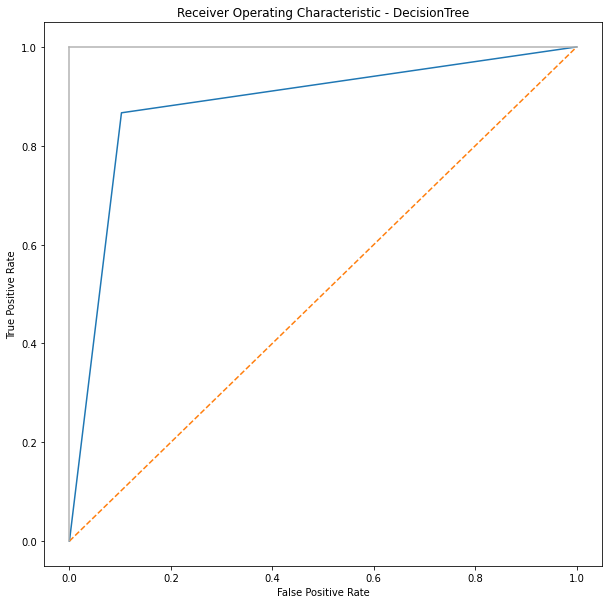

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Regression

In [ ]:
from google.colab import files
import io
import pandas as pd
import numpy as np
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['regdata.xlsx']))

Saving regdata.xlsx to regdata.xlsx


In [ ]:
df.head()

,Price,Dem
0,3.0,7479
1,3.6,6304
2,40.0,94
3,21.0,349
4,4.0,7095


<AxesSubplot:xlabel='naturalLogPrice', ylabel='naturalLogDemand'>

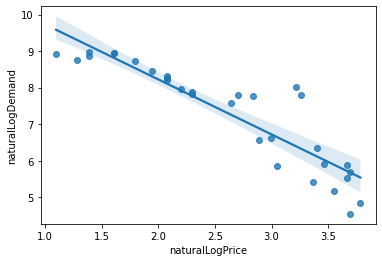

In [ ]:
import seaborn as sns
df2 = df[['Price','Dem']]
#rho=df2['Price'].corr(df2['Demand'])
df2['naturalLogPrice'] = np.log(df2['Price'])
df2['naturalLogDemand'] = np.log(df2['Dem'])

sns.regplot(x="naturalLogPrice", y="naturalLogDemand", data=df2, fit_reg=True)

In [ ]:
X=df2[['naturalLogPrice']]
y=df2['naturalLogDemand']


In [ ]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
print(y_pred)


[9.58353854 9.30893947 5.68227212 6.6527544  9.15025335 6.11555731
 6.16661729 6.88492461 7.92889099 8.53957217 8.81417124 8.10628697
 7.15952369 6.01835422 6.72623849 7.77020487 6.97101233 8.30740196
 5.7204039  9.15025335 5.8833871  5.7204039  5.53872306 5.68227212
 6.39015639 8.10628697 8.81417124 8.10628697 7.77020487 7.26343558
 6.33108508]


Evaluation Metrics

In [ ]:
from scipy.stats import pearsonr
list1 = df2['naturalLogPrice']
list2 = df2['naturalLogDemand']
 

corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.905


In [ ]:
a = np.sum((y-y_pred)**2)
n =np.size(y)

mse = a/n
print("Mean Squared Error",mse)

Mean Squared Error 0.3454660948504056


In [ ]:
rmse = math.sqrt(mse)
print("Root Mean Squared Error ",rmse)

Root Mean Squared Error  0.5877636385915733


In [ ]:
q = np.sum((y-y_pred)**2)
my = np.sum(y)/n
mx =np.sum(X)/n
p = np.sum((y-my)**2)

R2 = 1-(q/p)
print("Coefficient of Determination ",R2)

Coefficient of Determination  0.8191308248745721


In [ ]:
b = np.sum(((y-y_pred)/y)**2)
rmsre = math.sqrt(b/n)
print("Root Mean Squared Relative Error ",rmsre)

Root Mean Squared Relative Error  0.09069297051123976


In [ ]:
a = np.sum(abs(y-y_pred))
n =np.size(y)

mae = a/n
print("Mean Absolute Error ",mae)

Mean Absolute Error  0.42009293046421337


In [ ]:
b = np.sum(abs((y-y_pred)/y))
mape = (100*b)/n
print("Mean absolute Percentage Error",mape)

Mean absolute Percentage Error 6.282253592691315
